In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Conjunto de datos con tags y identificador unico por cada uno.
df_tags = pd.read_csv('../raw/ml-20m/genome-tags.csv')
df_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [3]:
# Conjunto de datos con scores relevantes para cada pelicula segun los tags
df_tagScores = pd.read_csv('../raw/ml-20m/genome-scores.csv')
df_tagScores

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
11709763,131170,1124,0.58775
11709764,131170,1125,0.01075
11709765,131170,1126,0.01575
11709766,131170,1127,0.11450


In [4]:
# Merge de los dos conjuntos de datos
df_movies_tags = df_tagScores.merge(df_tags, how='right', on='tagId')
df_movies_tags

,movieId,tagId,relevance,tag
0,1,1,0.02500,007
1,2,1,0.03975,007
2,3,1,0.04350,007
3,4,1,0.03725,007
4,5,1,0.04200,007
...,...,...,...,...
11709763,130578,1128,0.01325,zombies
11709764,130840,1128,0.13375,zombies
11709765,131013,1128,0.01625,zombies
11709766,131168,1128,0.01725,zombies


In [10]:
df_movies_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
 3   tag        object 
dtypes: float64(1), int64(2), object(1)
memory usage: 357.4+ MB


Podemos observar que el dataframe resultante informa por cada una de las peliculas el nivel de relevancia para todos y cada uno de los tags

In [11]:
# Analisis descriptivo
df_movies_tags.describe()

,movieId,tagId,relevance
count,1.170977e+07,1.170977e+07,1.170977e+07
mean,2.584297e+04,5.645000e+02,1.164833e-01
std,3.467615e+04,3.256254e+02,1.542463e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,2.926000e+03,2.827500e+02,2.425000e-02
50%,6.017000e+03,5.645000e+02,5.650000e-02
75%,4.606200e+04,8.462500e+02,1.415000e-01
max,1.311700e+05,1.128000e+03,1.000000e+00


El analisis se centrara en la columna relevance:

- Media: Es aproximadamente 0.116,en promedio, los tags tienen una relevancia moderada en las películas.
- Desviacion estandar: Dado que la desviación estándar es relativamente alta (aproximadamente 0.154), podemos
hacer referencia a presencias de outliers.
- Min/Max: La relevancia mínima es 0.00025, lo que sugiere que algunos tags tienen una relevancia muy baja en algunas películas. La relevancia máxima es 1, lo que indica que algunos tags son muy relevantes en ciertos casos.

<Axes: xlabel='relevance', ylabel='Count'>

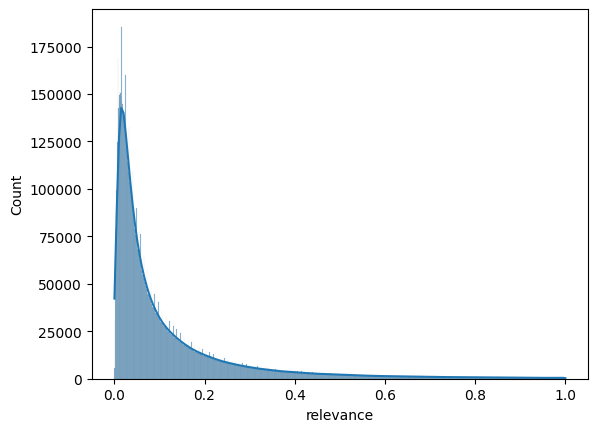

In [12]:
# Distribucion relevance en grafico
sns.histplot(data=df_movies_tags, x='relevance', kde=True)

Claramente observamos un sesgo hacia la derecha. La mayoria de los tags no presentan ni un 20% de relevancia.

También, contamos con muchos valores atipicos a lo largo de la distribucion

In [47]:
# mediana de cada tag 
group_tags = df_movies_tags.groupby(['tagId'])['relevance'].median()

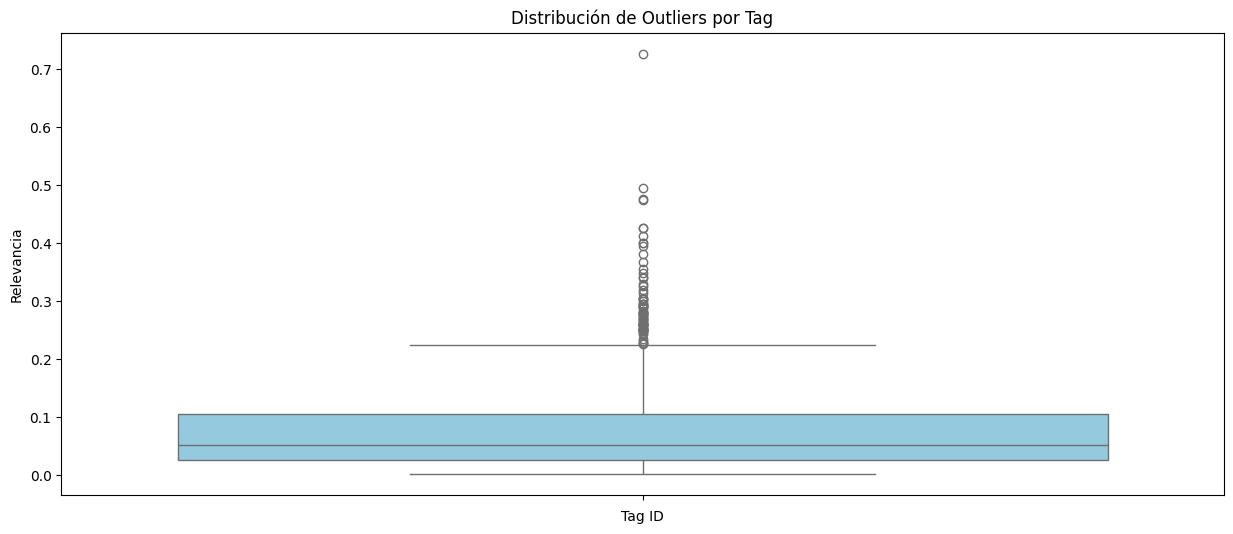

In [50]:
# Outliers
# Graficamos la agrupacion de tag calculada la mediana
plt.figure(figsize=(15, 6))
sns.boxplot( y=group_tags, color='skyblue')
plt.title('Distribución de Outliers por Tag')
plt.xlabel('Tag ID')
plt.ylabel('Relevancia')
plt.show()

Tras agrupar los tag y calcular su mediana, podemos observar como los atipicos se mantienen, presentando bastantes de ellos

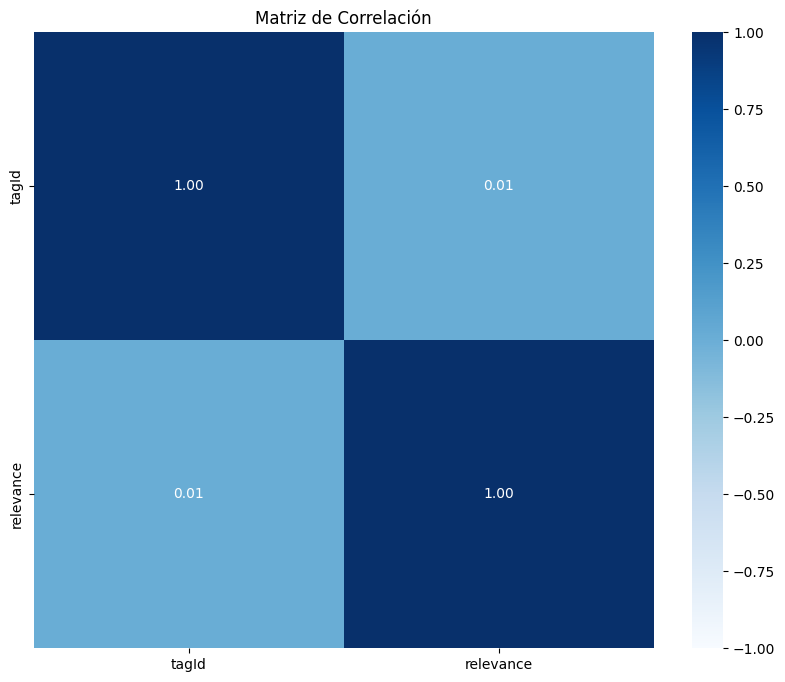

In [51]:
# Correlacion entre relevancia y tags
df_numeric = df_movies_tags.drop(['movieId', 'tag'], axis=1)
corr = df_numeric.corr()

plt.figure(figsize=(10, 8))
# Crear el heatmap con etiquetas y formato
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

No hay relacion directa entre los tag y el nivel de relevancia